# NASA Space Apps Challenge 2024

In [80]:
import ee 

In [81]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='nasa-hackathon-wlad-l3irfane')

In [82]:

# Define the polygon for your farm area using the provided coordinates
farm_polygon = ee.Geometry.Polygon([[
    [-6.8671295908890565, 33.9851601652823],
    [-6.867515828907651, 33.98543594585054],
    [-6.868057635128659, 33.98483990285423],
    [-6.8676553303776425, 33.98459970524122],
    [-6.8671295908890565, 33.9851601652823]
]])

# 1. Soil Phosphorus
soil_data = ee.Image("ISDASOIL/Africa/v1/phosphorus_extractable")
soil_clip = soil_data.clip(farm_polygon)
soil_stats = soil_clip.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=farm_polygon,
    scale=30
)

# 2. Climate Data (Temperature and Precipitation)
climate_data = ee.ImageCollection("ECMWF/ERA5_LAND/HOURLY").filterDate('2023-01-01', '2023-12-31')
climate_clip = climate_data.select(['temperature_2m', 'total_precipitation']).mean().clip(farm_polygon)
climate_stats = climate_clip.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=farm_polygon,
    scale=1000
)

# 3. Water Data
water_data = ee.ImageCollection('MODIS/006/MOD44W').filterDate('2023-01-01', '2023-12-31')
water_clip = water_data.mean().clip(farm_polygon)
water_stats = water_clip.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=farm_polygon,
    scale=500
)

# Additional Soil Data
# 4. Soil pH
soil_ph_data = ee.Image("ISDASOIL/Africa/v1/ph")
soil_ph_clip = soil_ph_data.clip(farm_polygon)
soil_ph_stats = soil_ph_clip.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=farm_polygon,
    scale=30
)

# 5. Organic Carbon (SOC)
soil_carbon_data = ee.Image("ISDASOIL/Africa/v1/carbon_organic")
soil_carbon_clip = soil_carbon_data.clip(farm_polygon)
soil_carbon_stats = soil_carbon_clip.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=farm_polygon,
    scale=30
)

# 6. Soil Texture (Sand, Silt, Clay)
soil_texture_data = ee.Image("ISDASOIL/Africa/v1/sand_content")
soil_texture_clip = soil_texture_data.clip(farm_polygon)
soil_texture_stats = soil_texture_clip.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=farm_polygon,
    scale=30
)

# Similarly for silt and clay
soil_silt_data = ee.Image("ISDASOIL/Africa/v1/silt_content")
soil_silt_clip = soil_silt_data.clip(farm_polygon)
soil_silt_stats = soil_silt_clip.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=farm_polygon,
    scale=30
)

soil_clay_data = ee.Image("ISDASOIL/Africa/v1/clay_content")
soil_clay_clip = soil_clay_data.clip(farm_polygon)
soil_clay_stats = soil_clay_clip.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=farm_polygon,
    scale=30
)

# 7. Cation Exchange Capacity (CEC)
soil_cec_data = ee.Image("ISDASOIL/Africa/v1/cation_exchange_capacity")
soil_cec_clip = soil_cec_data.clip(farm_polygon)
soil_cec_stats = soil_cec_clip.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=farm_polygon,
    scale=30
)

# Combine all the retrieved data
combined_data = {
    "soil_properties": soil_stats.getInfo(),
    "soil_ph": soil_ph_stats.getInfo(),
    "soil_carbon": soil_carbon_stats.getInfo(),
    "soil_texture": soil_texture_stats.getInfo(),
    "soil_silt": soil_silt_stats.getInfo(),
    "soil_clay": soil_clay_stats.getInfo(),
    "soil_cec": soil_cec_stats.getInfo(),
    "climate_conditions": climate_stats.getInfo(),
    "water_conditions": water_stats.getInfo()
}

print(combined_data)

{'soil_properties': {'mean_0_20': 24.14174757281553, 'mean_20_50': 21.44530744336569, 'stdev_0_20': 2.159223300970874, 'stdev_20_50': 1.159223300970874}, 'soil_ph': {'mean_0_20': 66.23559870550162, 'mean_20_50': 66.27249190938511, 'stdev_0_20': 2.200647249190938, 'stdev_20_50': 3}, 'soil_carbon': {'mean_0_20': 21.963106796116502, 'mean_20_50': 17.3631067961165, 'stdev_0_20': 2.695792880258899, 'stdev_20_50': 2.5365695792880256}, 'soil_texture': {'mean_0_20': 52.79288025889967, 'mean_20_50': 50.543042071197405, 'stdev_0_20': 6.279611650485436, 'stdev_20_50': 5.763106796116505}, 'soil_silt': {'mean_0_20': 17.543042071197405, 'mean_20_50': 17.543042071197405, 'stdev_0_20': 2.159223300970874, 'stdev_20_50': 2.2996763754045304}, 'soil_clay': {'mean_0_20': 24.662135922330098, 'mean_20_50': 29.51844660194174, 'stdev_0_20': 2.7177993527508084, 'stdev_20_50': 1.9812297734627828}, 'soil_cec': {'mean_0_20': 23.170873786407768, 'mean_20_50': 23.726860841423946, 'stdev_0_20': 2.3974110032362455, 's

In [88]:
import pandas as pd
import numpy as np

# List of crops for recommendation
crops = [
    'Wheat', 'Barley', 'Tomatoes', 'Carrots', 'Potatoes', 'Spinach', 'Rice', 
    'Sugarcane', 'Lettuce', 'Maize', 'Peanuts', 'Beans', 'Sorghum'
]

# Define precise environmental conditions based on recommendations
crop_conditions = {
    'Wheat': {
        'soil_mean_0_20': (20, 35), 'soil_mean_20_50': (15, 30), 'soil_ph': (6, 7.5),
        'soil_carbon': (12, 25), 'soil_cec': (20, 30), 'temperature': (280, 300), 'water_needs': (0.4, 0.7)
    },
    'Barley': {
        'soil_mean_0_20': (15, 30), 'soil_mean_20_50': (10, 25), 'soil_ph': (5.5, 7.5),
        'soil_carbon': (10, 20), 'soil_cec': (15, 25), 'temperature': (270, 290), 'water_needs': (0.1, 0.3)
    },
    'Tomatoes': {
        'soil_mean_0_20': (25, 45), 'soil_mean_20_50': (20, 40), 'soil_ph': (6, 6.8),
        'soil_carbon': (20, 35), 'soil_cec': (25, 35), 'temperature': (290, 310), 'water_needs': (0.4, 0.7)
    },
    'Carrots': {
        'soil_mean_0_20': (20, 35), 'soil_mean_20_50': (15, 30), 'soil_ph': (6, 7),
        'soil_carbon': (10, 20), 'soil_cec': (15, 25), 'temperature': (280, 295), 'water_needs': (0.1, 0.3)
    },
    'Potatoes': {
        'soil_mean_0_20': (20, 40), 'soil_mean_20_50': (15, 35), 'soil_ph': (5.5, 7),
        'soil_carbon': (15, 30), 'soil_cec': (20, 30), 'temperature': (280, 295), 'water_needs': (0.4, 0.7)
    },
    'Spinach': {
        'soil_mean_0_20': (15, 30), 'soil_mean_20_50': (10, 25), 'soil_ph': (6.5, 7.5),
        'soil_carbon': (12, 25), 'soil_cec': (20, 30), 'temperature': (285, 300), 'water_needs': (0.4, 0.7)
    },
    'Sugarcane': {
        'soil_mean_0_20': (30, 50), 'soil_mean_20_50': (25, 45), 'soil_ph': (6.5, 7.5),
        'soil_carbon': (30, 45), 'soil_cec': (35, 50), 'temperature': (300, 315), 'water_needs': (0.8, 1.2)
    },
    'Lettuce': {
        'soil_mean_0_20': (15, 25), 'soil_mean_20_50': (10, 20), 'soil_ph': (6.5, 7),
        'soil_carbon': (10, 20), 'soil_cec': (15, 25), 'temperature': (275, 290), 'water_needs': (0.1, 0.3)
    },
    'Maize': {
        'soil_mean_0_20': (25, 40), 'soil_mean_20_50': (20, 35), 'soil_ph': (5.5, 7),
        'soil_carbon': (20, 35), 'soil_cec': (25, 35), 'temperature': (285, 305), 'water_needs': (0.4, 0.7)
    },
    'Peanuts': {
        'soil_mean_0_20': (20, 35), 'soil_mean_20_50': (15, 30), 'soil_ph': (6, 7.5),
        'soil_carbon': (15, 25), 'soil_cec': (20, 30), 'temperature': (290, 310), 'water_needs': (0.1, 0.3)
    },
    'Beans': {
        'soil_mean_0_20': (15, 30), 'soil_mean_20_50': (10, 25), 'soil_ph': (6.5, 7.5),
        'soil_carbon': (12, 25), 'soil_cec': (20, 30), 'temperature': (280, 295), 'water_needs': (0.4, 0.7)
    }
}

# Generate 50 rows per crop based on the valid range for each feature
rows = []
for crop, conditions in crop_conditions.items():
    for _ in range(30):
        row = {
            'Crop': crop,
            'soil_mean_0_20': np.random.uniform(*conditions['soil_mean_0_20']),
            'soil_mean_20_50': np.random.uniform(*conditions['soil_mean_20_50']),
            'soil_ph': np.random.uniform(*conditions['soil_ph']),
            'soil_carbon': np.random.uniform(*conditions['soil_carbon']),
            'soil_cec': np.random.uniform(*conditions['soil_cec']),
            'temperature_2m': np.random.uniform(*conditions['temperature']),
            'water_needs_meters': np.random.uniform(*conditions['water_needs'])
        }
        rows.append(row)

# Create DataFrame
df = pd.DataFrame(rows)

# Save as CSV for later use in the model
df.to_csv('precise_crop_dataset.csv', index=False)

# Show the first few rows of the dataset
df.head()

,Crop,soil_mean_0_20,soil_mean_20_50,soil_ph,soil_carbon,soil_cec,temperature_2m,water_needs_meters
0,Wheat,23.174350,27.301757,6.386858,19.791933,23.916222,293.036063,0.564959
1,Wheat,20.478595,17.384844,6.934080,14.749478,27.510580,294.456587,0.440306
2,Wheat,26.924384,19.565779,6.083083,23.511740,28.425647,295.050129,0.622061
3,Wheat,24.145781,28.991394,6.152874,17.064813,29.605727,295.913076,0.570344
4,Wheat,23.812426,16.133988,6.091381,16.368555,20.551390,282.269681,0.452677


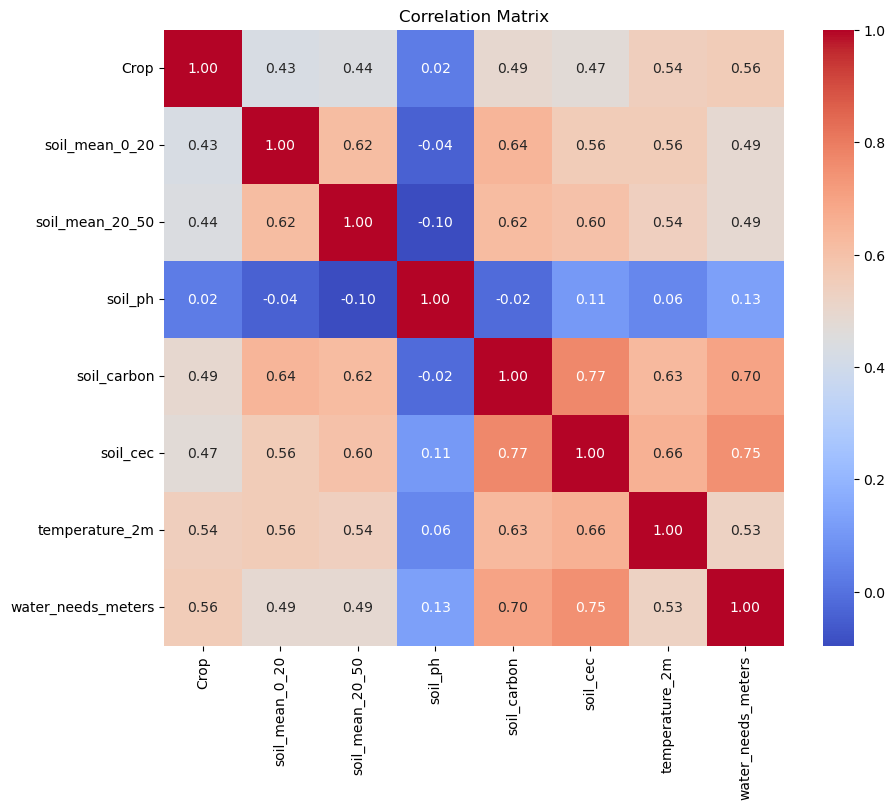

In [93]:
# plot the correlation matrix wiyth seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# encode the crop names using label encoding
df['Crop'] = df['Crop'].astype('category')
df['Crop'] = df['Crop'].cat.codes

# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

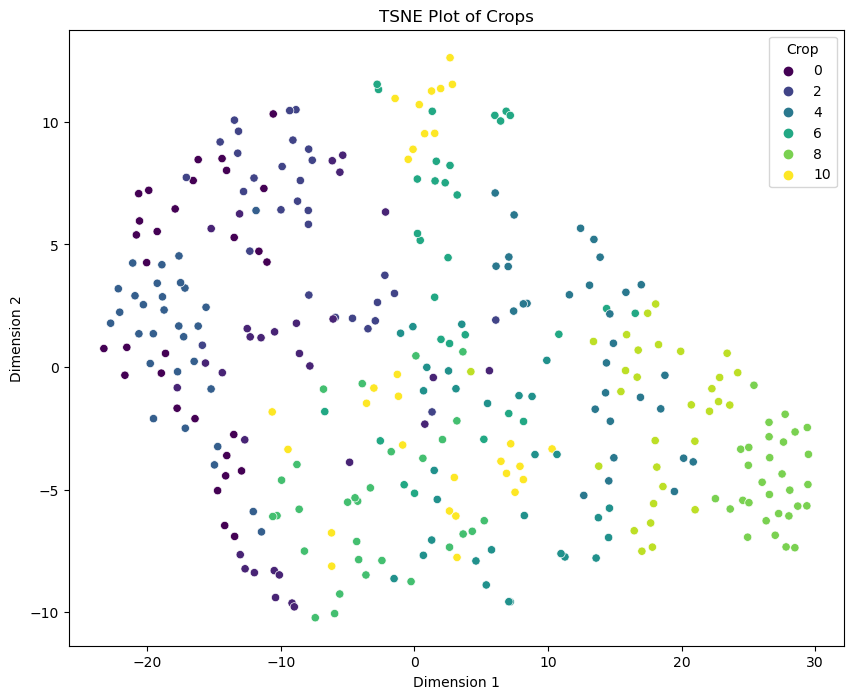

In [94]:
# use TSNE to plot the data in 2D
from sklearn.manifold import TSNE

# Initialize TSNE
tsne = TSNE(n_components=2, random_state=42)

# encode the crop names as integers
df['Crop'] = df['Crop'].astype('category')
df['Crop'] = df['Crop'].cat.codes

# Fit and transform the data
tsne_features = tsne.fit_transform(df)

# Create a new DataFrame for plotting
tsne_df = pd.DataFrame(data=tsne_features, columns=['Dimension 1', 'Dimension 2'])

# Add the target variable to the DataFrame
tsne_df['Crop'] = df['Crop']

# Plot the data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Crop', data=tsne_df, palette='viridis')
plt.title('TSNE Plot of Crops')
plt.show()

Accuracy: 0.30303030303030304


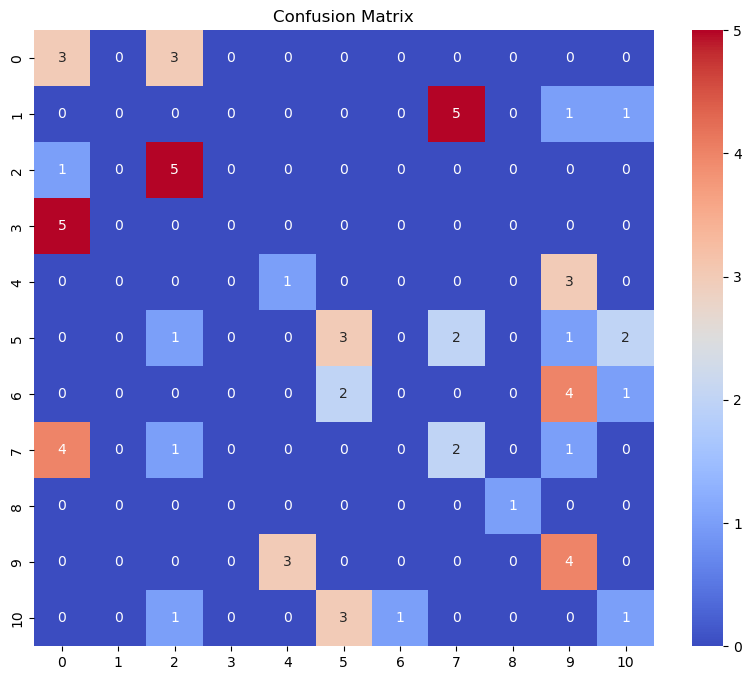

In [104]:
# train a neural network model to predict the crop based on the environmental conditions
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the dataset into features and target
X = df.drop('Crop', axis=1)
y = df['Crop']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the classification report
print(f'Accuracy: {accuracy}')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.6515151515151515


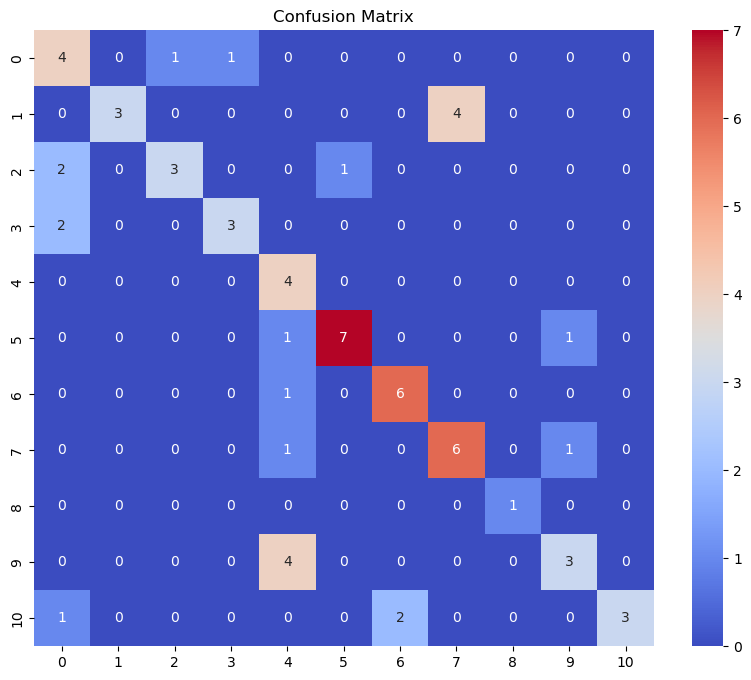

['crop_recommendation_model.pkl']

In [106]:
# train XGBoost model
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Display the classification report
print(f'Accuracy: {accuracy_xgb}')

# Display the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model
import joblib

# Save the model
joblib.dump(model, 'crop_recommendation_model.pkl')